In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
restaurant_df = pd.read_csv('data/full_restaurant_rating_data.csv')

### Computing % of restaurants labelled as travellors choice

In [5]:
travellors_choice_data = [[ round(restaurant_df[restaurant_df['is_travellors_choice'] == True].shape[0] / restaurant_df.shape[0] * 100,2),
round(restaurant_df[restaurant_df['is_travellors_choice'] == False].shape[0] / restaurant_df.shape[0] * 100,2)]]

travellors_choice_df = pd.DataFrame(travellors_choice_data, columns=['is_travellors_choice = True','is_travellors_choice = False'])
travellors_choice_df


,is_travellors_choice = True,is_travellors_choice = False
0,3.28,96.72


### Compute % of restaurants given michellin star

In [6]:
michellin_data = [[ round(restaurant_df[restaurant_df['is_michellin'] == True].shape[0] / restaurant_df.shape[0] * 100,2),
round(restaurant_df[restaurant_df['is_michellin'] == False].shape[0] / restaurant_df.shape[0] * 100,2)]]

michellin_df = pd.DataFrame(michellin_data, columns=['is_michellin = True','is_michellin = False'])
michellin_df

,is_michellin = True,is_michellin = False
0,1.75,98.25


### Compute correlation between is_travellors_choice, is_michellin with overall_rating

In [192]:
#anova r test within each category 
restaurant_df_copy = restaurant_df.copy()
restaurant_df_copy['is_travellors_choice'] = restaurant_df_copy['is_travellors_choice'].astype(int)
restaurant_df_copy['is_michellin'] = restaurant_df_copy['is_michellin'].astype(int)

restaurant_df_copy = restaurant_df_copy[['is_travellors_choice','is_michellin','overall_rating']]
restaurant_df_copy.corr(method='pearson')

,is_travellors_choice,is_michellin,overall_rating
is_travellors_choice,1.000000,0.148237,0.111390
is_michellin,0.148237,1.000000,0.066304
overall_rating,0.111390,0.066304,1.000000


### Boxplot of Number of Ratings

Text(0, 0.5, 'number of reviews')

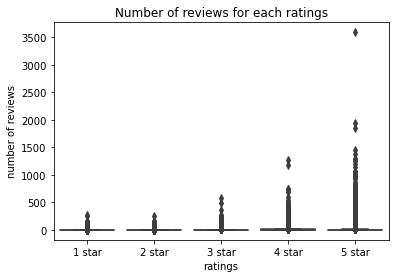

In [208]:
num_of_ratings_df = restaurant_df.copy()

num_of_ratings_df = num_of_ratings_df[['num_of_rating_1','num_of_rating_2','num_of_rating_3','num_of_rating_4','num_of_rating_5']]

# renaming the columns for easier identification
num_of_ratings_df.rename(columns = {'num_of_rating_1':'1 star', 'num_of_rating_2':'2 star', 'num_of_rating_3':'3 star', 'num_of_rating_4':'4 star', 'num_of_rating_5':'5 star'}, inplace = True)

num_of_ratings_melted = pd.melt(num_of_ratings_df)

#print(num_of_ratings_melted)

#create seaborn plot
sns.boxplot(x='variable', y='value', data=num_of_ratings_melted).set(title = 'Number of reviews for each ratings')
plt.xlabel('ratings')
plt.ylabel('number of reviews')

### Histogram of Overall Rating

(11161, 35)

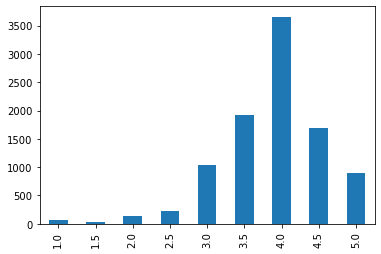

In [209]:
# plotting only overall_ratings that are not -1
overall_rating_df = restaurant_df.copy()

overall_rating_df[overall_rating_df['overall_rating'] != -1]['overall_rating'].value_counts().sort_index().plot.bar()

overall_rating_df.shape

### Food rating, Service rating, Value rating, Atmosphere rating

<AxesSubplot:xlabel='variable', ylabel='value'>

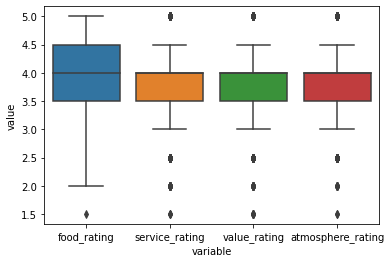

In [183]:
various_ratings_df = restaurant_df.copy()

various_ratings_df = various_ratings_df[['food_rating','service_rating','value_rating','atmosphere_rating']]

various_ratings_melted = pd.melt(various_ratings_df)

# create seaborn plot
sns.boxplot(x='variable', y='value', data=various_ratings_melted)